## Topic: Heart Failure Prediction Project Only EDA

### OUTCOMES

- 1. Exploration of Numerical Features

- 2. Exploration of Categorical Features

- 3. Relationship between Features and Target

- 4. Correlation Matrix and Heatmap

- 5. Categorical Features vs Target Features

# 1. Exploration of Numerical Features

-  Heart Failure Prediction Project  

- Dataset: **Heart Failure Prediction** from Kaggle (`heart.csv`)

- Link: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download

### step_1: import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

sns.set(font_scale = 1.1)


- Upload file form local to colob
    - form google.colab import files

    - uploaded = files.upload()

### Step_02: upload file 

In [4]:
# upload file or (convert to df)

df = pd.read_csv("heart.csv")

df.head(8)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0


### Step_03: Basic info about row, columns, and data type

In [ ]:
# To see how many rows and columns (or how many entities or data)
print("Shape: ", df.shape)


Shape:  (918, 12)


In [5]:
# To see each column data type or numbers of missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


- For above code explain:
    - There are 918 non-null entities(data) among 918.
    - so, there are not non-null values.

### step_04: Quick Descriptive statistics for numerical columns.

In [7]:
# to see the statistical summaries

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


- Explain above code:
    - symmetirc distribution columns => Age, RestingBP 
    
    - larger spread columns => Cholesterol,MaxHR

    - Smaller spread columns => FastingBS,Oldpeak, HeartDisease 

### step_05: Define Target and Feature types (in manual way)

In [6]:
target_col = 'HeartDisease'

numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'FastingBS', 'Oldpeak']  # find by df.describe() method

categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope'] # find by df.info() method [see only object column]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [68]:
print("Target Column: ", target_col)

print("\n-----------------------------------------------------------------------------------------")

print("Numerical Column: ", numerical_cols)

print("\n-----------------------------------------------------------------------------------------")


print("Categorical Column: ", categorical_cols)

Target Column:  HeartDisease

-----------------------------------------------------------------------------------------
Numerical Column:  ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'FastingBS', 'Oldpeak']

-----------------------------------------------------------------------------------------
Categorical Column:  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


### step_06: Missing Value and Basic quality checks

In [18]:
# Check missing values and count per column

df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

- Above Code Explain:
    - We can see there are no missing value in any columns.

In [20]:
# look at some basic value range [for better understanding the numerical columns]

df[numerical_cols].agg(['min', 'max', 'mean','median']).T

,min,max,mean,median
Age,28.0,77.0,53.510893,54.0
RestingBP,0.0,200.0,132.396514,130.0
Cholesterol,0.0,603.0,198.799564,223.0
MaxHR,60.0,202.0,136.809368,138.0
FastingBS,0.0,1.0,0.233115,0.0
Oldpeak,-2.6,6.2,0.887364,0.6


In [24]:
# Check the unique value in categorical column

for c in categorical_cols:
    print(c,': ', df[c].unique())

Sex :  ['M' 'F']
ChestPainType :  ['ATA' 'NAP' 'ASY' 'TA']
RestingECG :  ['Normal' 'ST' 'LVH']
ExerciseAngina :  ['N' 'Y']
ST_Slope :  ['Up' 'Flat' 'Down']


- Explain above code:
    - See the unique values to understand there are any doplicate values or not?
    - for sex column:
        - F - Female  [Same meaning]
        - M - male, 
        '  F '(leading and tailing spaces)

### step_07: understanding distribution with histogram and boxplots

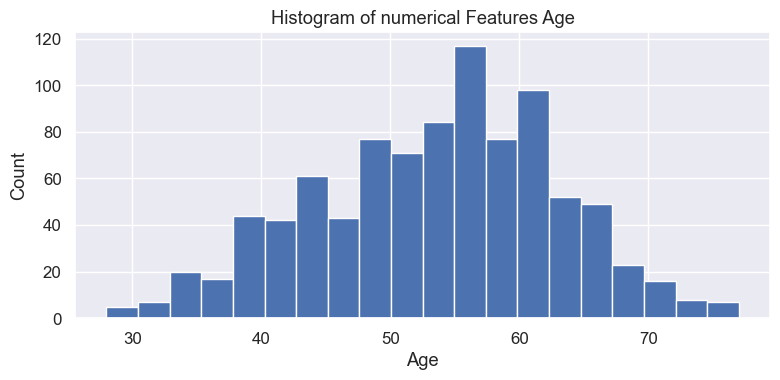

In [46]:
# Histogram  for single (individual) column

df["Age"].hist(bins = 20, figsize=(8,4))

plt.title("Histogram of numerical Features Age")
plt.xlabel("Age")
plt.ylabel("Count")

plt.tight_layout()

plt.show()

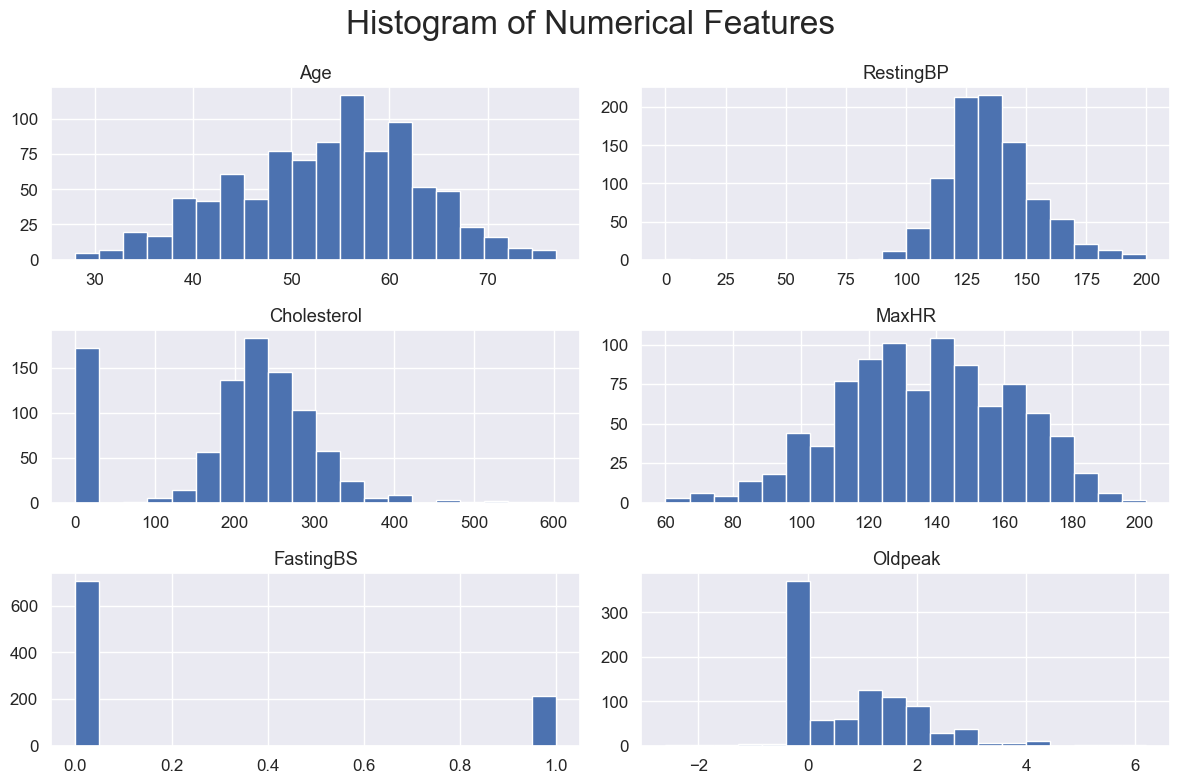

In [52]:
# Histogram for multiple numerical columns

df[numerical_cols].hist(bins = 20, figsize=(12,8))

plt.suptitle("Histogram of Numerical Features", fontsize = 24)

plt.tight_layout()

plt.show()

- What do we understand?
    - Age colums => uniform distribution [- here data are symmetric]
    
    - RestingBP colums => uniform distribution [- here we see, data are also symmetric]
    
    - Cholesterol colums => here, some outliers are exists
    
    - MaxHR colums => here, some outliers are exist but overall data is uniform distribution
    
    - FastingBS colums => 
    
    - Oldpeak colums => Outliers exist 

In [55]:
df[numerical_cols].head(2)

,Age,RestingBP,Cholesterol,MaxHR,FastingBS,Oldpeak
0,40,140,289,172,0,0.0
1,49,160,180,156,0,1.0


#### - Boxplot to get a sense of spread and possible outliers

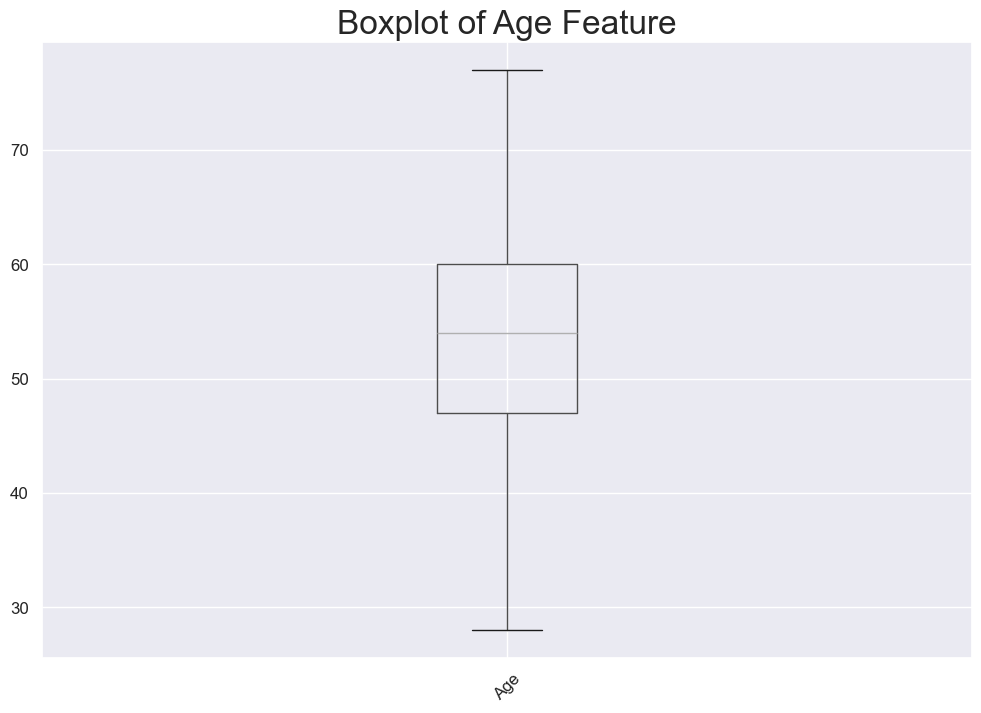

In [61]:
# Boxplot for individuals or single column

plt.figure(figsize = (12,8))

df.boxplot(column = numerical_cols[0])  # [0,1,2,...]

plt.title("Boxplot of Age Feature", fontsize = 24)

plt.xticks(rotation = 45)

plt.show()

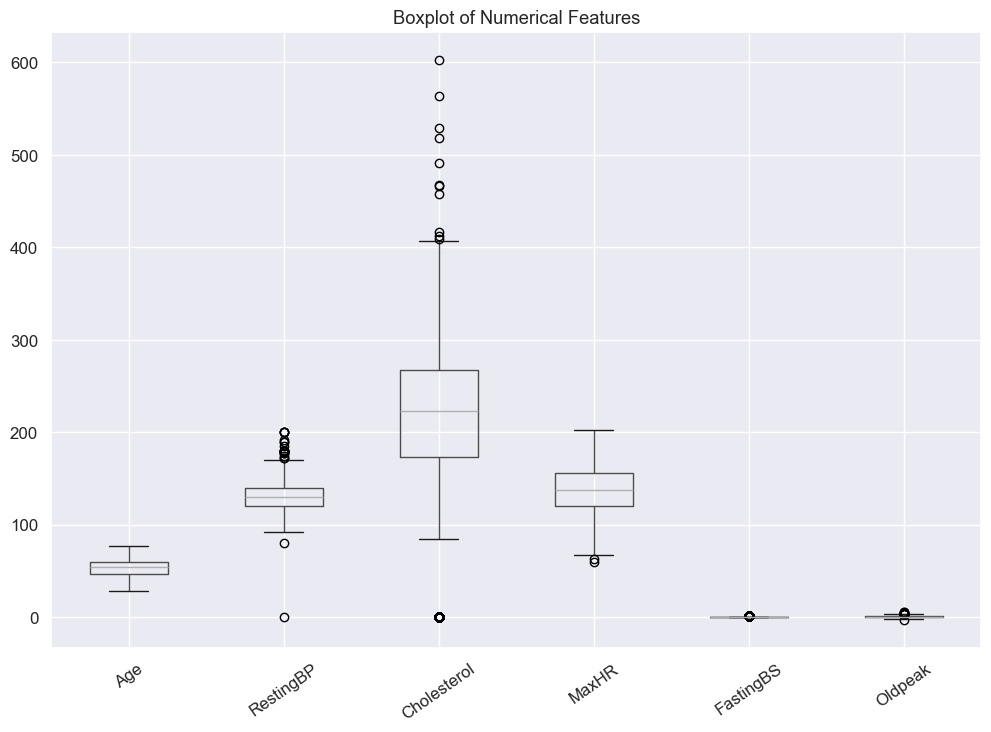

In [65]:
# Boxplot for multiple numerical features

plt.figure(figsize = (12,8))

df[numerical_cols].boxplot()

plt.title("Boxplot of Numerical Features")

plt.xticks(rotation = 35)
plt.show()


### step_08: Target column distribution and check class imbalance

C:\Users\HP\AppData\Local\Temp\ipykernel_9916\695927399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[target_col],palette=['Purple', 'Blue'])


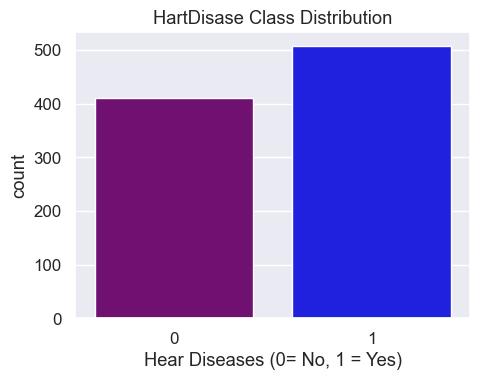

In [85]:
plt.figure(figsize=(5,4))

sns.countplot(x=df[target_col],palette=['Purple', 'Blue'])



plt.title("HartDisase Class Distribution")

plt.xlabel("Hear Diseases (0= No, 1 = Yes)")

plt.ylabel("count")

plt.tight_layout()

plt.show()

- here we see the class are almost balance

In [7]:
# another way to check class balance in percentage format

df[target_col].value_counts(normalize = True) * 100

HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64

- so, 55 % are HartDisase
- 44% are patient are not HartDisase


- So, class is not imbalance

# 2. Exploration of Categorical Features

In [88]:
categorical_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

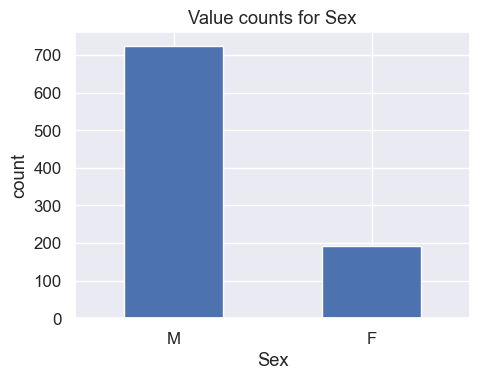

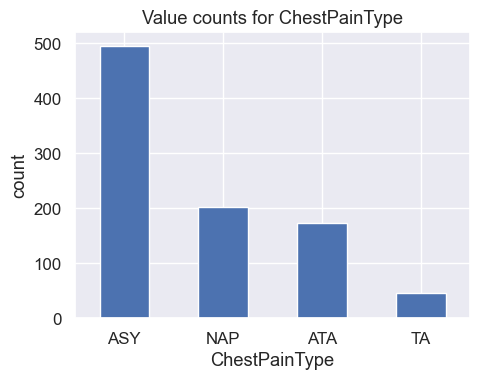

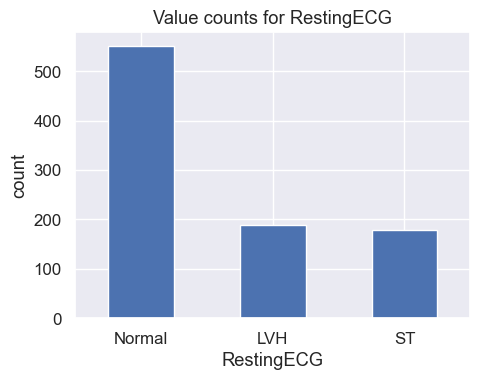

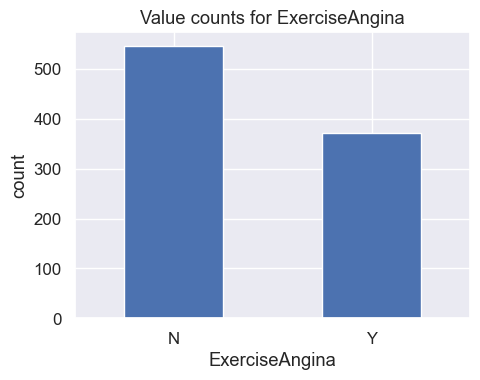

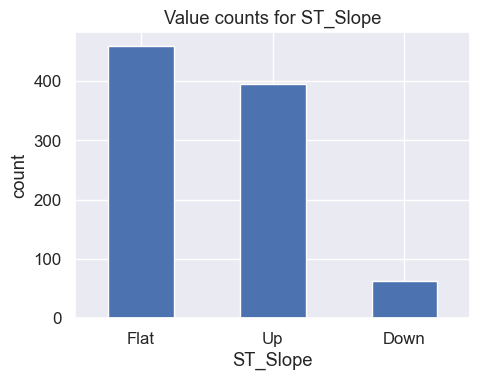

In [ ]:
# categorical Features Exploration using bar plot

for c in categorical_cols:

    plt.figure(figsize = (5,4))
    
    df[c].value_counts().plot(kind = 'bar')

    plt.title(f"Value counts for {c}")

    plt.ylabel("count")

    plt.xticks(rotation = 0) # [Default - 90]

    plt.tight_layout()

    plt.show()

- Explaination:
    - we can see that the each Categorical features data distribution.

    - if multiple features values are too small and they are relavent then we merge the those two features.

# 3. Relationship between Features and Target

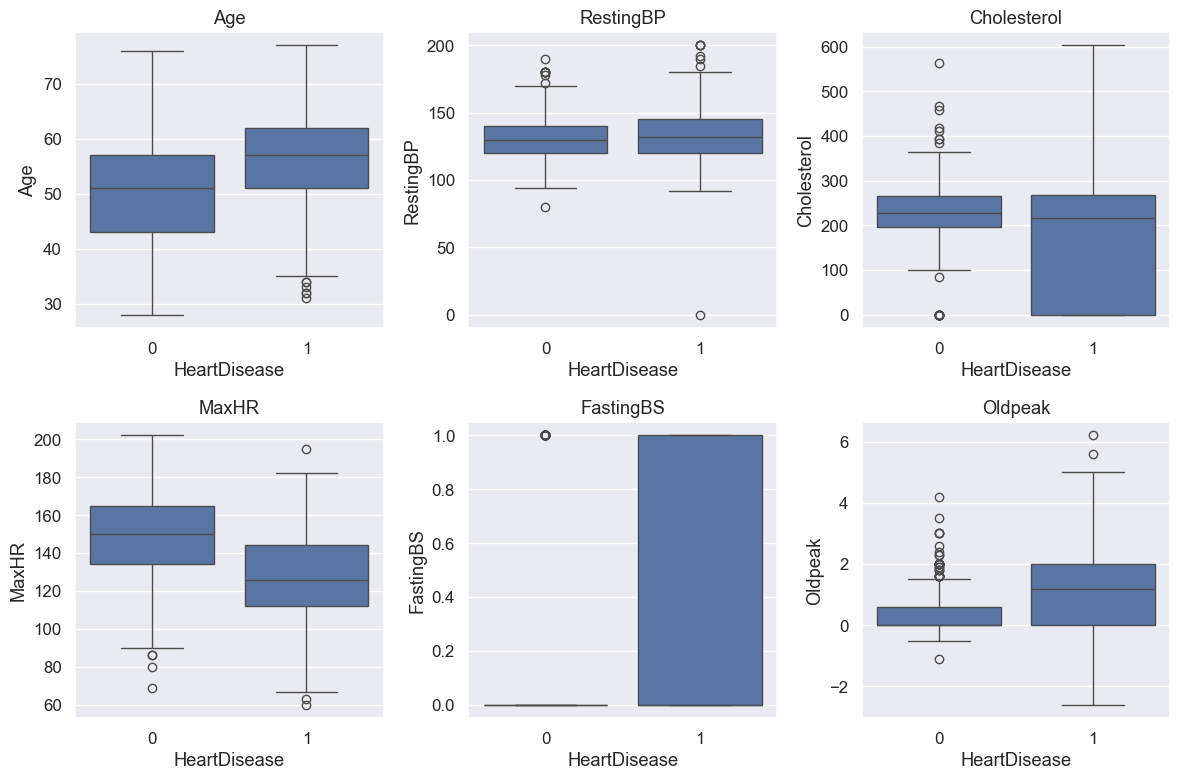

In [99]:
# Relationship between numerical features and target features and look at correlations using boxplot.

# boxplot of numerical features split by heartDisease(target features)

plt.figure(figsize = (12,8))

for i, col in enumerate(numerical_cols , 1):
    
    plt.subplot(2,3,i)

    sns.boxplot(x = df[target_col], y = df[col])

    plt.title(col)


plt.tight_layout()
plt.show()

## - 3.1 Pairplot for numerical columns (To see the correlation between each features)

In [100]:
numerical_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'FastingBS', 'Oldpeak']

In [101]:
target_col

'HeartDisease'

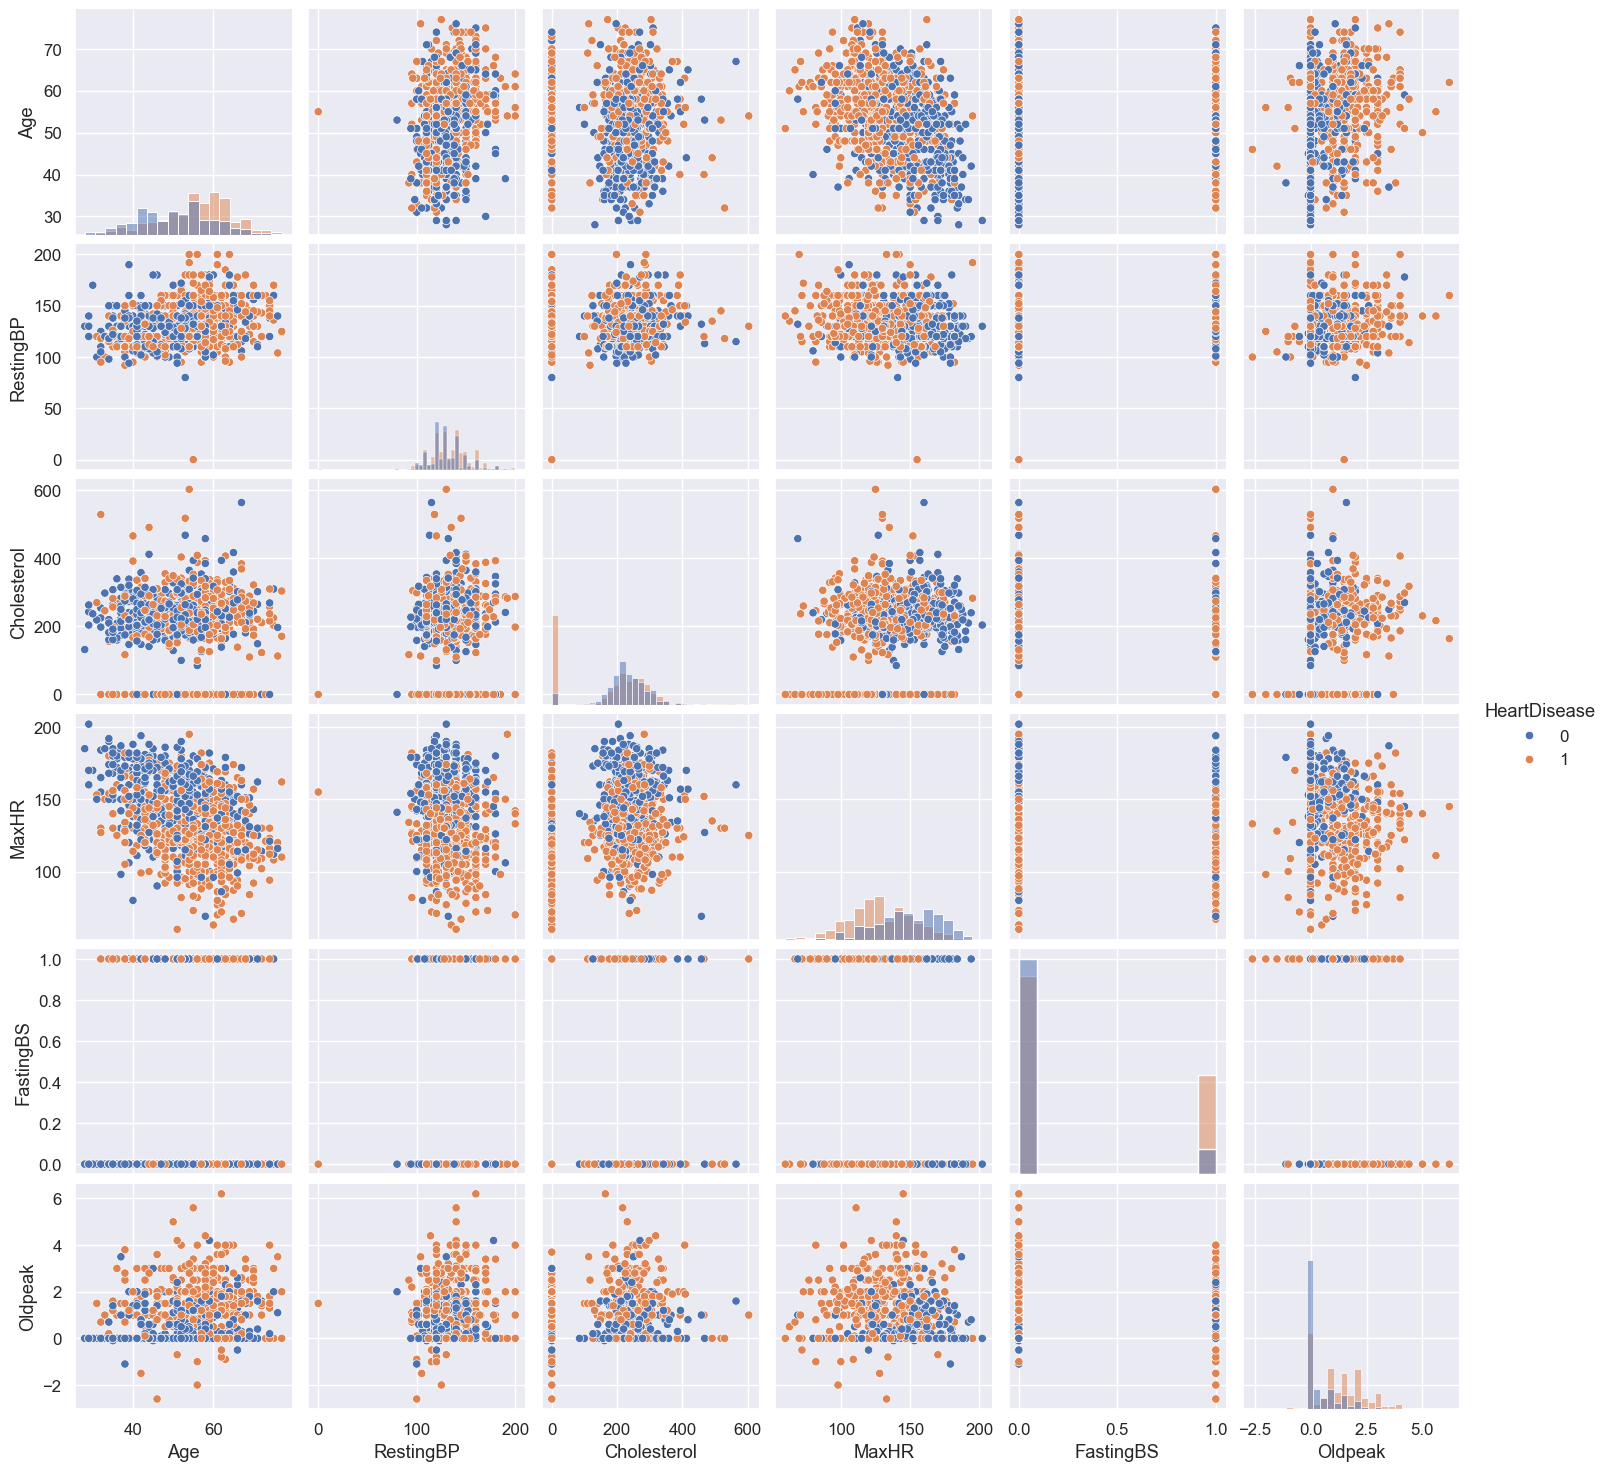

In [106]:
# pairplot

sns.pairplot(df[['Age','RestingBP', 'Cholesterol', 'MaxHR', 'FastingBS', 'HeartDisease', 'Oldpeak']], hue = 'HeartDisease', diag_kind = 'hist')


plt.show()


# 4. Correlation Matrix and Heatmap

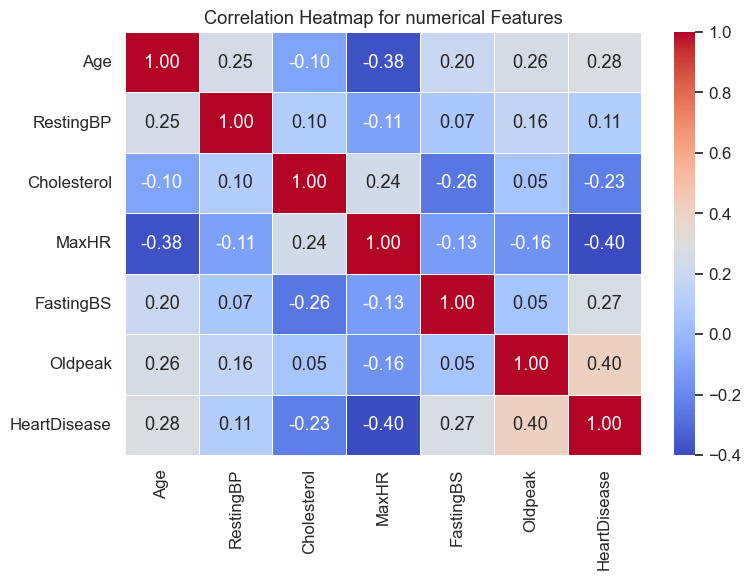

In [ ]:
# Corrlation only for numerical features

corr_matrix = df[numerical_cols + [target_col]].corr()

plt.figure(figsize = (8,6))

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)

plt.title("Correlation Heatmap for numerical Features")

plt.tight_layout()
plt.xticks(rotation = 90) # 90 default

plt.show()

### - The correlation between target features and each features in percentage format

In [115]:
corr_matrix[target_col].sort_values(ascending = False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

# 5. Categorical Features vs Target Features

In [118]:
categorical_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


 Proporation of HeartDisease within Sex


HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724


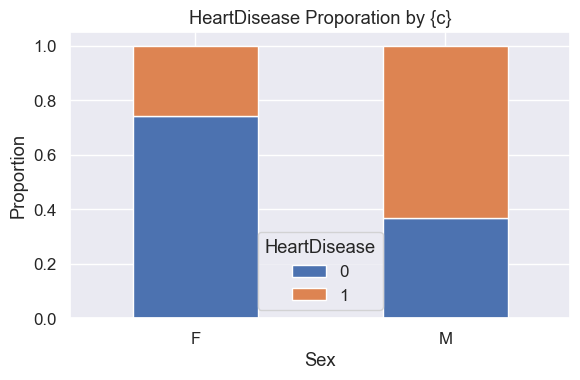


 Proporation of HeartDisease within ChestPainType


HeartDisease,0,1
ChestPainType,,
ASY,0.209677,0.790323
ATA,0.861272,0.138728
NAP,0.645320,0.354680
TA,0.565217,0.434783


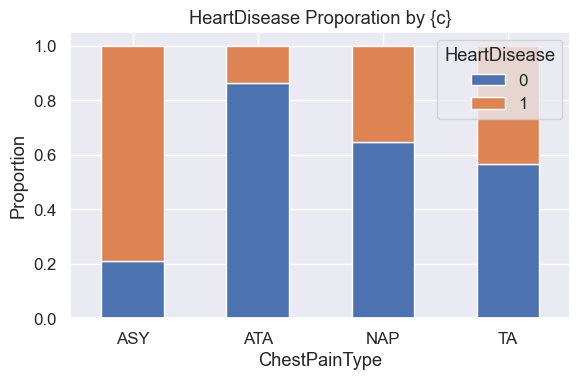


 Proporation of HeartDisease within RestingECG


HeartDisease,0,1
RestingECG,,
LVH,0.436170,0.563830
Normal,0.483696,0.516304
ST,0.342697,0.657303


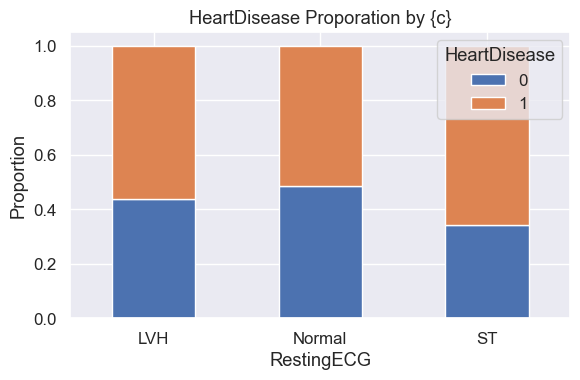


 Proporation of HeartDisease within ExerciseAngina


HeartDisease,0,1
ExerciseAngina,,
N,0.648995,0.351005
Y,0.148248,0.851752


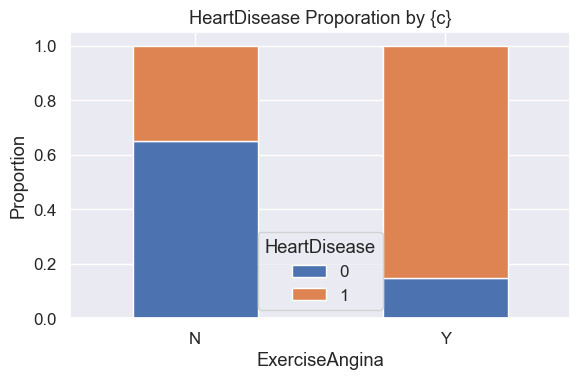


 Proporation of HeartDisease within ST_Slope


HeartDisease,0,1
ST_Slope,,
Down,0.222222,0.777778
Flat,0.171739,0.828261
Up,0.802532,0.197468


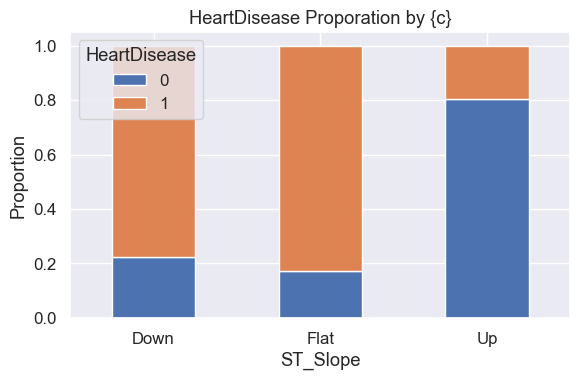

In [119]:
# relationship between categorical feature and target features

for c in categorical_cols:
    # corss table generated between each categorical column with target column
    ct = pd.crosstab( df[c], df[target_col], normalize = 'index')


    print(f"\n Proporation of HeartDisease within {c}")

    display(ct)

    # plot

    ct.plot(kind = 'bar', stacked = True, figsize = (6,4))

    plt.title("HeartDisease Proporation by {c}")

    plt.ylabel("Proportion")

    plt.xticks(rotation = 0)

    plt.tight_layout()

    plt.show()


    